In [13]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from data_extraction import *

defaultdict(<class 'list'>, {20000: [7.434381558, 7.418605125, 7.565136953, 7.992794089, 7.548518791], 15000: [7.657772962, 7.505637431, 7.452748047, 7.441889804, 7.668475648], 10000: [8.132434432, 8.080129281, 8.112759047, 8.117004849, 7.907153327], 5000: [9.617947978, 9.152555216, 9.244167568, 9.312867128, 9.318030979], 1000: [18.738869166, 18.586756406, 18.539017304, 18.899492587, 18.771399606]})
defaultdict(<class 'list'>, {20000: [8.152979237, 8.281684727, 8.233092466, 8.142928553, 8.195537227], 15000: [8.218022836, 8.081536744, 8.205564526, 8.177831047, 8.129956774], 10000: [8.759989214, 8.842215924, 8.757971035, 8.702202124, 8.787732903], 5000: [10.018557072, 9.924583164, 9.873894225, 9.891806315, 9.895014215], 1000: [19.392181015, 19.670626571, 19.695222239, 19.263540236, 19.767623026]})


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

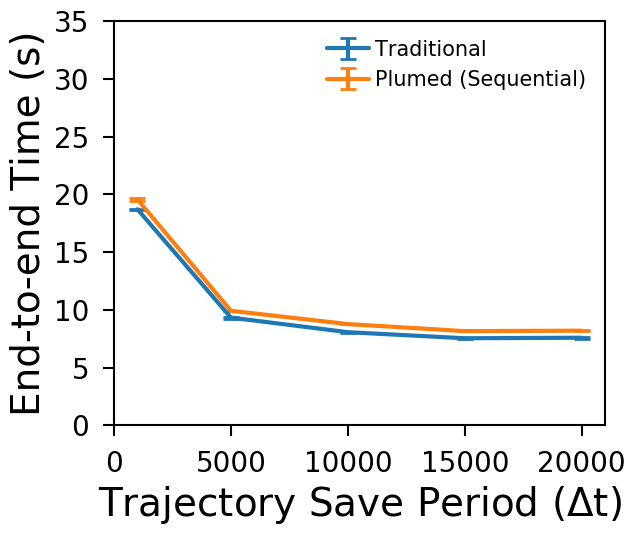

In [15]:
def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))

# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}
for path,legend in paths.items():
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        L=get_L(log_file)
        N=get_N(log_file)
        #print(L,N)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        total_times[dump_interval].append(total_time)
        
    print(total_times)
    mean_tts = [np.mean(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    std_tts = [stats.sem(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    dump_intervals = total_times.keys()
    plt.errorbar(dump_intervals,mean_tts,std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("End-to-end Time (s)")
plt.legend(fontsize=15)
plt.ylim(0,35)
plt.xlim(0,21000)
plt.savefig('figure_ETE.png', transparent=True)
plt.show()

defaultdict(<class 'list'>, {15: [18.957489447, 18.744125343, 18.560801783, 18.924323318, 19.050505233], 30: [151.584150374, 147.912304753, 151.210909624, 147.812543663, 147.51649747], 60: [1309.593728783, 1319.158282856, 1296.561144642, 1274.035592013, 1281.91499594]})
defaultdict(<class 'list'>, {15: [19.214859983, 19.380932582, 19.682573454, 19.307686695, 19.851271826], 30: [153.98531246, 159.307728223, 156.63882573, 154.44297835, 154.309560781], 60: [1366.659056041, 1367.453411356, 1370.879549831, 1394.367926614, 1365.250058725]})


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


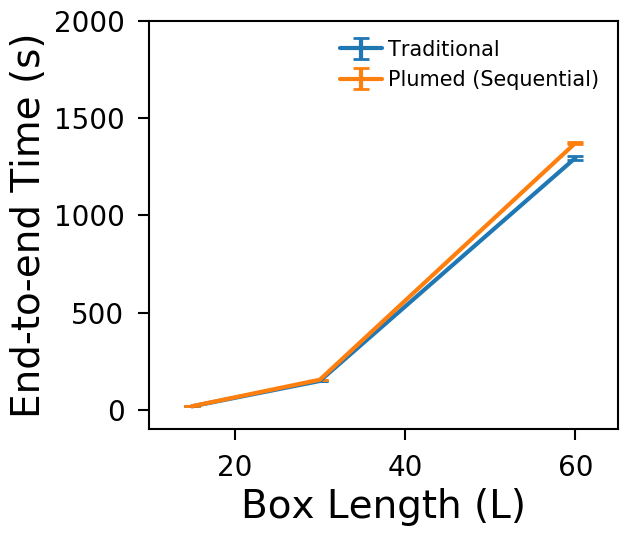

In [16]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


# This will return absolute paths
paths = {'sequential_vary_N':'Traditional','sequential_in_transit_vary_N':'Plumed (Sequential)'}
for path,legend in paths.items():
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        total_time=0
        dump_interval = None
        sim_times=[]
        L=0
        with open(log_file) as fp:
            line = fp.readline()
            #print(line)
            while line:
                if 'DUMP_INTERVAL' in line:
                    #print(line)
                    values = line.split(':')
                    if float(values[1]) >500:
                        dump_interval = float(values[1])
                if 'Created orthogonal box =' in line:
                    values = line.split(' ')
                    L = int(values[-2])
                if 'Created ' in line:
                    values = line.split(' ')
                    if values[2] == 'atoms\n':
                        N = float(values[1])
                        #print('N:',N)
                if 'Total wall time' in line:
                    values = line.split(':')
                    sim_time = float(timestamp_to_seconds(values[1:]))
                    sim_times.append(sim_time)
                if 'ETE_TIME' in line:
                    #print(line)
                    values = line.split(':')
                    total_time = float(values[1])
                    break
                line = fp.readline()
            if total_time >0 and dump_interval is not None and N is not None:
                total_times[L].append(total_time)
        if len(sim_times)>0 and dump_interval is not None:
            #print(log_file)
            sim_time_dict[dump_interval].append(sim_times[-1])
        else:
            #print('Could not find sim time in ',log_file)
            continue
    print(total_times)
    mean_tts = [np.mean(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    std_tts = [stats.sem(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    dump_intervals = total_times.keys()
    plt.errorbar(dump_intervals,mean_tts,std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Box Length (L)")
plt.ylabel("End-to-end Time (s)")
plt.legend(fontsize=15)
plt.ylim(-100,2000)
plt.xlim(10,65)
plt.savefig('figure_ETE_vary_N.png', transparent=True)
plt.show()